<a href="https://colab.research.google.com/github/ReneeZhang2017/customer-churn/blob/master/Individaul_Assignment_3_Renee_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
Consider the following facts from a research conducted by Bain & Company:

The cost of acquiring a new customer can be higher than that of retaining a customer by as much as 700%.
Increasing customer retention rates by a mere 5% could increase profits by 25% to 95%.

These are some pretty significant numbers. Therefore, it’s a no-brainer that customer retention is one of the most critical goals for businesses. Retained customers are also more likely to be more engaged and open to up-selling and cross-selling.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

In Telco customer churn prediction, there are 3 numeric variables and 18 factor variables including the response variable "Churn". We have to predict for the given data set (simply a row of data), Whether customer will churn or not.




# 2. Import Data

In [78]:
import numpy as np
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ReneeZhang2017/customer-churn/master/Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
df.shape

(7043, 21)

In [0]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# 3. EDA

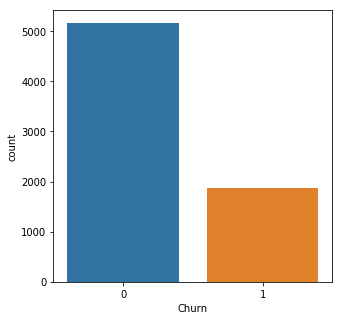

In [0]:
# Count of Churn
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize= (5, 5))
sns.countplot(x= 'Churn', data = df2)

**The dataset has around 5000 customers will churn "No"  and over 2000 customers will churn "Yes".**

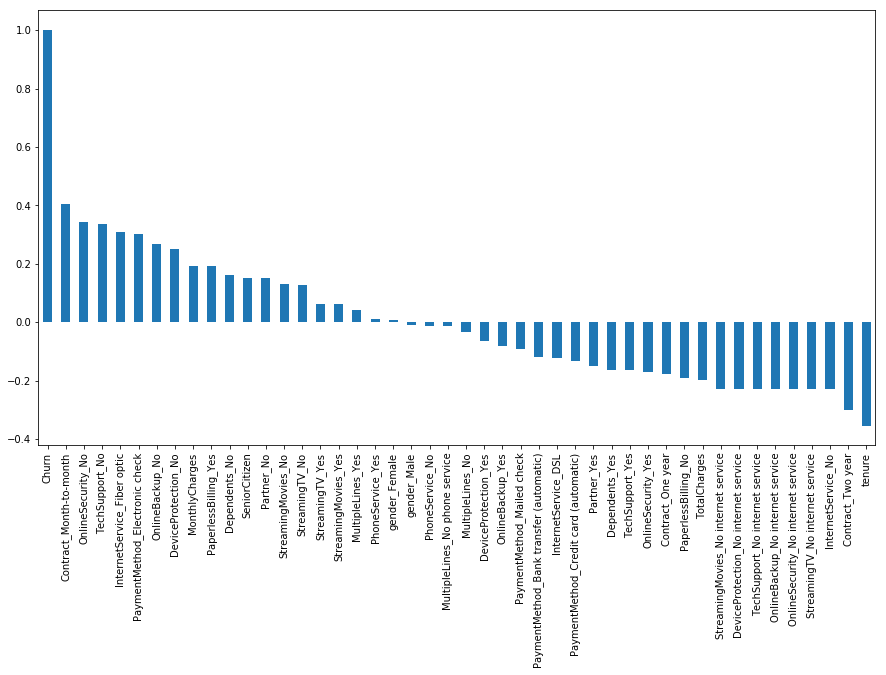

In [0]:
#visulized the correlation relationship between "Churn" and all other variables
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Fromt the chart above, we can see that "gender", "Multiplelines", "phone service" do relative weak correlatioship with "Churn". 

#### And "Contract_Month-to-month", "OnlineSecurity", "TechSupport", "InternetService", "PaymentMethod", "OnlineBack", "DeviceProtection" and so on have relative strong correlationship with "Churn" 

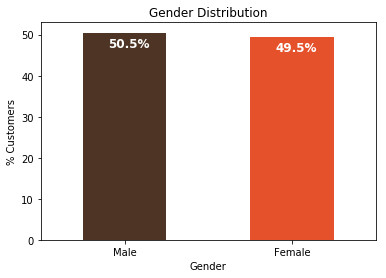

In [0]:
# Gender distribution 
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

#### Gender distribution are relative even

Text(0.5, 1.0, '% of Senior Citizens')

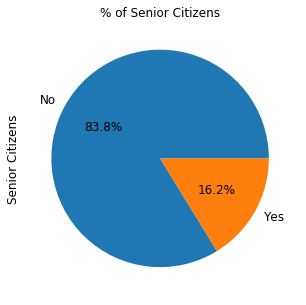

In [0]:
#Senior Citizens
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '# of Customers by Contract Type')

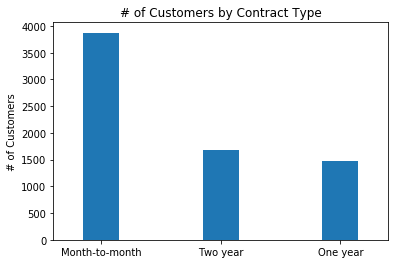

In [0]:
# of Customers by Contract Type
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

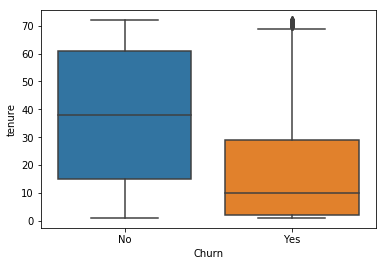

In [0]:
#Churn vs Tenure
sns.boxplot(x = df.Churn, y = df.tenure)

#### the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

Text(0.5, 1.0, 'Distribution of total charges by churn')

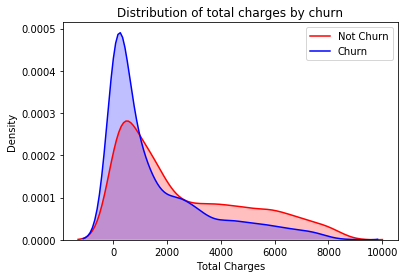

In [0]:
#Churn by Total Charges
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

#### It seems that there is higer churn when the total charges are lower.

# 4. Model

## 4.1 Split Dataset

In [0]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 4.2  Apply LogisticRegression, SVM, RandomForest classification algorithms

### 4.2.1 Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)
predict1 = log.predict(X_test)
AS1=accuracy_score(y_test,predict1)
print('Accuracy Score: ',AS1)

Accuracy Score:  0.8075829383886256


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


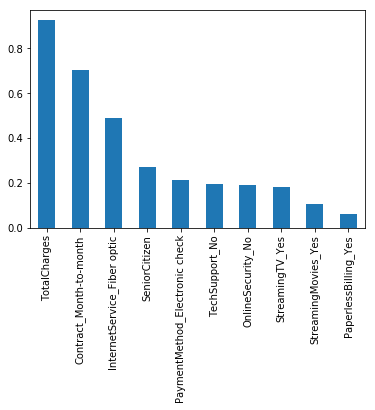

In [76]:
# To get the weights of all the variables
weights = pd.Series(log.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


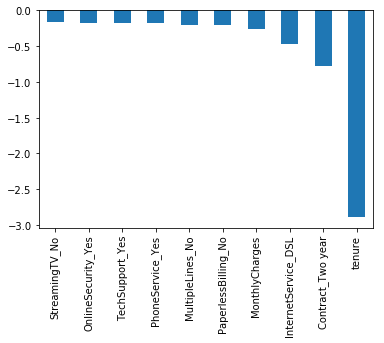

In [77]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

### 4.2.2 SVM

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
predict2 = clf.predict(X_test)
AS2=accuracy_score(y_test,predict2)
print('Accuracy Score: ',AS2)

Accuracy Score:  0.8014218009478673


### 4.2.3 RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
predict3 = rfc.predict(X_test)
AS3=accuracy_score(y_test,predict3)
print('Accuracy Score: ',AS3)

Accuracy Score:  0.7781990521327015


## 4.3 Model Summary

In [0]:
mss = [['LogisticRegression', AS1], ['SVM', AS2], ['RandomForest', AS3]]   
ms = pd.DataFrame(mss, columns = ['Model', 'Accuracy Score'])  
ms

,Model,Accuracy Score
0,LogisticRegression,0.807583
1,SVM,0.801422
2,RandomForest,0.778199


# 5. Apply GridSearchCV to find the best hyperparameters for your models

## 5.1 Logistic Regression

In [0]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
predict = logreg_cv.predict(X_test)
ass1=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass1)

## 5.2 SVM

In [0]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
svc_model = GridSearchCV(svc, parameters, cv=5)
svc_model.fit(X_train,y_train)
predict = svc_model.predict(X_test)
ass2=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass2)

Accuracy Score:  0.8061611374407583


## 5.3 Random Forest

In [0]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc_model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_model.fit(X_train, y_train)
predict = rfc_model.predict(X_test)
ass3=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass3)

Accuracy Score:  0.771090047393365


## 5.4 Summary

In [0]:
mss = [['LogisticRegression', ass1], ['SVM', ass2], ['RandomForest', ass3]]   
ms = pd.DataFrame(mss, columns = ['Model', 'Accuracy Score'])  
ms

,Model,Accuracy Score
0,LogisticRegression,0.805213
1,SVM,0.806161
2,RandomForest,0.771090


# 6. Model Performance (confusion matrix, precision, recall, ROC AUC)

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

## 6.1 Logistic Regression

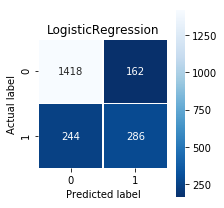

In [0]:
cm = metrics.confusion_matrix(y_test, predict1)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('LogisticRegression', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
results1 = confusion_matrix(y_test, predict1)
print('Confusion Matrix :')
print(results1)

precision1 = precision_score(y_test, predict1)
print('Precision_LogisticRegression: %f' % precision1)

recall1 = recall_score(y_test, predict1)
print('Recall_LogisticRegression: %f' % recall1)

auc1 = roc_auc_score(y_test, predict1)
print('ROC AUC_LogisticRegression: %f' % auc1)

Confusion Matrix :
[[1418  162]
 [ 244  286]]
Precision_LogisticRegression: 0.638393
Recall_LogisticRegression: 0.539623
ROC AUC_LogisticRegression: 0.718545


## 6.2 SVM

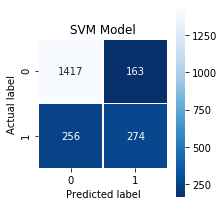

In [0]:
cm = metrics.confusion_matrix(y_test, predict2)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('SVM Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
results2 = confusion_matrix(y_test, predict2)
print('Confusion Matrix :')
print(results2)

precision2 = precision_score(y_test, predict2)
print('Precision_SVM: %f' % precision2)

recall2 = recall_score(y_test, predict2)
print('Recall_SVM: %f' % recall2)

auc2 = roc_auc_score(y_test, predict2)
print('ROC AUC_SVM: %f' % auc2)

Confusion Matrix :
[[1417  163]
 [ 256  274]]
Precision_SVM: 0.627002
Recall_SVM: 0.516981
ROC AUC_SVM: 0.706908


## 6.3 Random Forest

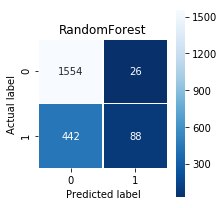

In [0]:
cm = metrics.confusion_matrix(y_test, predict3)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('RandomForest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
results3 = confusion_matrix(y_test, predict3)
print('Confusion Matrix :')
print(results3) 

precision3 = precision_score(y_test, predict3)
print('Precision_RandomForest: %f' % precision3)

recall3 = recall_score(y_test, predict3)
print('Recall_Randomforest: %f' % recall3)

auc3 = roc_auc_score(y_test, predict3)
print('ROC AUC_RandomForest: %f' % auc3)

Confusion Matrix :
[[1554   26]
 [ 442   88]]
Precision_RandomForest: 0.771930
Recall_Randomforest: 0.166038
ROC AUC_RandomForest: 0.574791


## 6.4 Summary

In [0]:
mmss = [['LogisticRegression', precision1,recall1,auc1], ['SVM', precision2,recall2,auc2], ['RandomForest', precision3,recall3,auc3]]   
ms = pd.DataFrame(mmss, columns = ['Model', 'Precision','Recall','AUC'])  
ms

,Model,Precision,Recall,AUC
0,LogisticRegression,0.638393,0.539623,0.718545
1,SVM,0.627002,0.516981,0.706908
2,RandomForest,0.771930,0.166038,0.574791


## **Interpretation**

**Precision**：Precision is the number of document retrieved that are relevant (tp / (tp + fp)). High precision score means low "***false positive***". So Random Forest has the fewest false positive errors.

**Recall**：Recall is the number of relevant document that are retrieved (tp / (tp + fn)). High recall score means low "***false negative***". So Logistic Regression has the fewest false negative errors.

**Two Types of Error:**

In statistical hypothesis testing a type I error is the acceptance of a false hypothesis (also known as a "***false positive***" finding or conclusion), while a type II error is the rejection of a true hypothesis (also known as a "***false negative***" finding or conclusion). In this case, "***false negative***" means predicting a customer that will churn as will not churn  and "***false positive***" means predicting a patient will not churn as will churn. 


**Beware of the false positives**
A significant problem with effective churn management is the high rate of false positives in churn prediction models. The false positives can have severe detrimental impact on any initiatives undertaken to address churn since they would increase the cost of the programs. To put it simply — you would essentially be spending good money trying to retain customers that were never really at risk of leaving you because of these false positive predictions of high risk.

Since it is much more serious of "***false positive***" , so the ideal model is the one that makes fewer "***false positive***" predictions. From confussion matrix, we know **Random Forest** is slightly better than the other models.However, Random forest have very low Recall score, so we should choose the second high precision score--- logistic regression.

**AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve:** also called "AUROC (Area Under the Receiver Operating Characteristics)"

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between customers who will churn or not. We can see Logistic Regression  has the highest AUC.

**Therefore, we should choose Logistic Regression model.**



# 8. Recommendation

We choose Logistic Regression.

So by looking back the charts (variables relationship with churns) that I made behind the logistic regression. we can get a results that "total charges", "monthly contracts", "fibre optic internet services" and "seniority" can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it.

1. So I would suggest that **Telephone service companies** should introduce more lower "total chargers" plan to customers. 
2. Since "Tenure" has strong negative relation with churn rate, **Telephone service companies** should provide more lower "Tenure" choice for customer.

